In [278]:
import pandas as pd
import numpy as np

data = pd.DataFrame([
    # [100, 1, 0, 3700],
    # [65, 2, 45, 50000],
    # [5000, 200, 100, 500_000],
    # [100, 100, 0, 5000],
    [100,	1,	0,	3700],
    [65,	2,	45,	10000],
    [5000,	200,	100,	500000],
    [100,	100,	0,	20000],
    # [300, 200, 0, 50000],
    # [55, 2, 25, 50000],
    # [4000, 200, 40, 500_000],
    # [10, 100, 0, 5000],
], columns=['num_employees', 'buildings', 'vehicles', 'co2'])

In [296]:
import random
random.seed(7)
np.random.seed(7)


df = pd.DataFrame()

n = 1000
input = np.random.exponential(scale=4500, size=n).astype(int)
num_employees = ((input**1.3/40 * (np.random.random(size=n)+0.5)) + 10000*np.random.random(size=n)).astype(int)
buildings = ((input**2/1e6 * (np.random.random(size=n)+0.5)) + 10*np.random.random(size=n)).astype(int)
vehicles = (input**1.2/1e2 * (np.random.random(size=n)+0.3) + 50*np.random.random(size=n)).astype(int)

copy = buildings[:100]
random.shuffle(copy)
buildings[:100] = copy

copy = vehicles[:100]
random.shuffle(copy)
vehicles[:100] = copy


df['num_employees'] = num_employees
df['buildings'] = buildings
df['vehicles'] = vehicles

<AxesSubplot: xlabel='num_employees', ylabel='co2'>

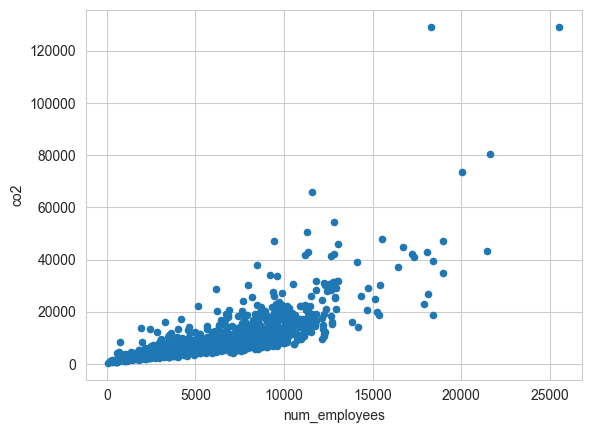

In [301]:
df['co2'] = (np.random.random(size=n)+1)*(
        (np.random.random(size=n)/2+1)*num_employees/2 +
        (np.random.random(size=n)/8+1)*buildings*34 +
        (np.random.random(size=n)/8+1)*vehicles*4
) + 300 * np.random.random(size=n)
# df.co2.plot.hist(bins=100)
df.plot.scatter(x='num_employees', y='co2')

In [302]:
df.to_csv('data/modeled_data.csv')

In [269]:
y = df.pop('co2')
X = df.copy()
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.coef_

array([11.05422115, 12.8234193 ,  6.52474359])

In [270]:
model.score(X, y)

0.9267368150887045

In [272]:
df

,num_employees,buildings,wehicles
0,357.196093,5,30
1,6811.914036,0,150
2,2596.418389,20,57
3,5784.383371,53,20
4,17173.062953,3,77
...,...,...,...
995,58.863783,0,38
996,9779.664476,63,83
997,4086.140522,24,28
998,4484.135240,11,77
